In [200]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns

In [201]:
from datetime import datetime
from tqdm import tqdm

In [202]:
from sklearn.model_selection import train_test_split

In [234]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, ElasticNetCV

In [203]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
matplotlib.rcParams['figure.figsize'] = (13.0, 6.0)

In [204]:
# read datasets
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### exploring data

In [205]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


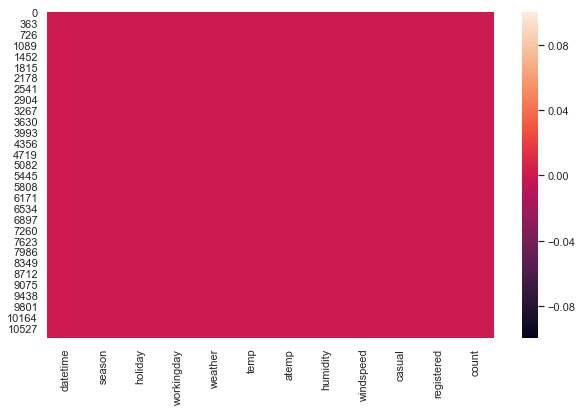

In [206]:
# checking for null values
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull())

In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [208]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [209]:
train_ts = train[['count']]
train_ts['datetime'] = pd.to_datetime(train['datetime'])
train_ts = train_ts.set_index('datetime')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [210]:
train_ts.shape[0]

10886

In [211]:
time_diff = train_ts.index[1] - train_ts.index[0]
count_time_gap = 0
time_gap_indexes = []
for n in tqdm(range(0, train_ts.shape[0]-1)):
    if (train_ts.index[n+1]-train_ts.index[n]) != time_diff:
        count_time_gap = count_time_gap + 1
        time_gap_indexes.append(n) 
print("No. of time-gaps:", count_time_gap)
print("time-gap indexes:", time_gap_indexes)

100%|██████████████████████████████████████| 10885/10885 [00:00<00:00, 27285.19it/s]


No. of time-gaps: 65
time-gap indexes: [28, 48, 71, 94, 117, 140, 235, 257, 304, 395, 410, 430, 434, 481, 504, 623, 645, 668, 716, 761, 783, 876, 1001, 1021, 1093, 1116, 1161, 1186, 1208, 1230, 1279, 1322, 1565, 1777, 2233, 2689, 3145, 3601, 3722, 3770, 3866, 4054, 4489, 4509, 4965, 5421, 5448, 5639, 5806, 5874, 5997, 6329, 6571, 6784, 6811, 7027, 7238, 7694, 8150, 8606, 9062, 9518, 9974, 10145, 10429]


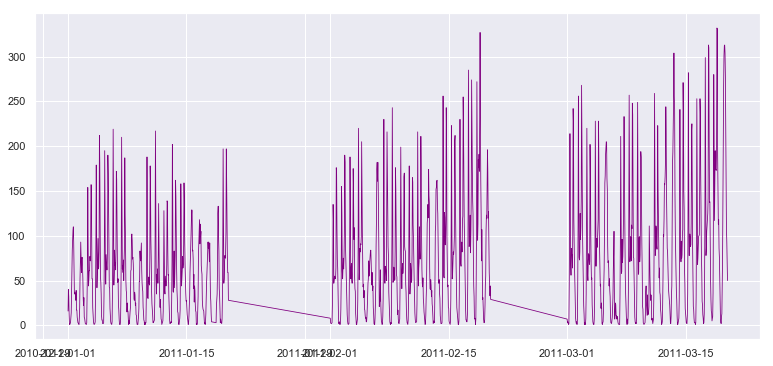

In [212]:
plt.plot(train_ts['2011-01':'2011-03'], color='purple', linewidth=0.8)

In [213]:
max(train_ts.index)

Timestamp('2012-12-19 23:00:00')

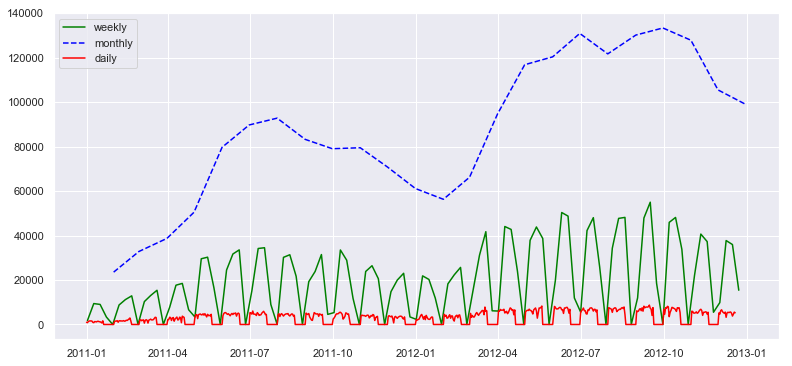

In [214]:
plt.plot(train_ts.resample('W').sum(), color='green', label='weekly') # weekly summation sampling
plt.plot(train_ts.resample('M').sum(), color='blue', linestyle='--', label='monthly') # monthly summation sampling
plt.plot(train_ts.resample('D').sum(), color='red', label='daily') # daily summation sampling
plt.legend()
plt.show()

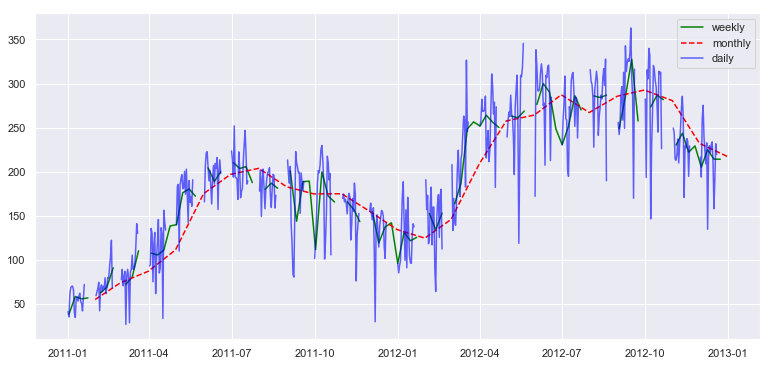

In [215]:
# mean weekly, monthly & daily sampling
plt.plot(train_ts.resample('W').mean(), color='green', label='weekly')
plt.plot(train_ts.resample('M').mean(), color='red', linestyle='--', label='monthly')
plt.plot(train_ts.resample('D').mean(), color='blue', alpha=0.6, label='daily')
plt.legend()
plt.show()

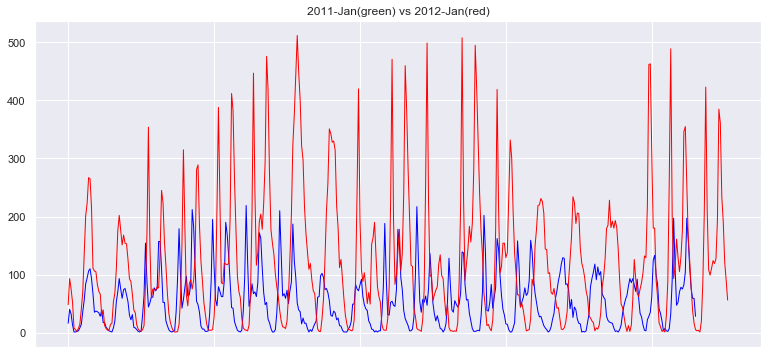

In [216]:
plt.title('2011-Jan(green) vs 2012-Jan(red)')
plt.plot(train_ts['2011-01'].values, linewidth=1, color='blue')
plt.plot(train_ts['2012-01'].values, linewidth=1, color='red')
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.show()

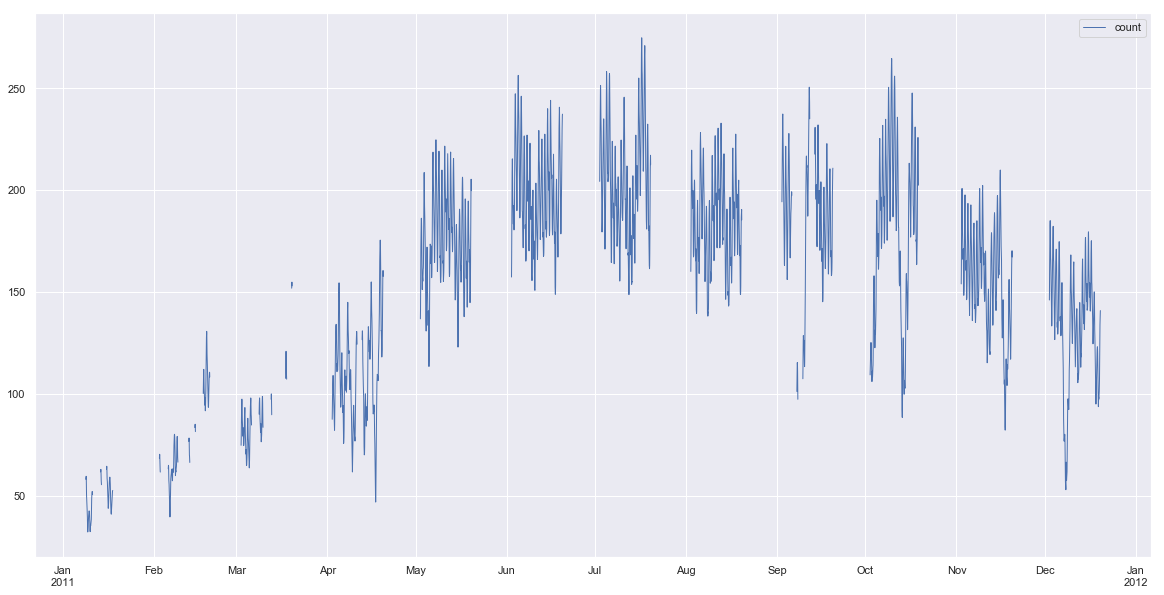

In [237]:
# plotting rolling average - TREND ANALYSIS
train_ts['2011'].rolling(40).mean().plot(figsize=(20,10), linewidth=1)

In [221]:
# creating a date range
idx = pd.date_range(start=min(train_ts.index), end=max(train_ts.index), freq='H')
train_ts = train_ts.reindex(idx)

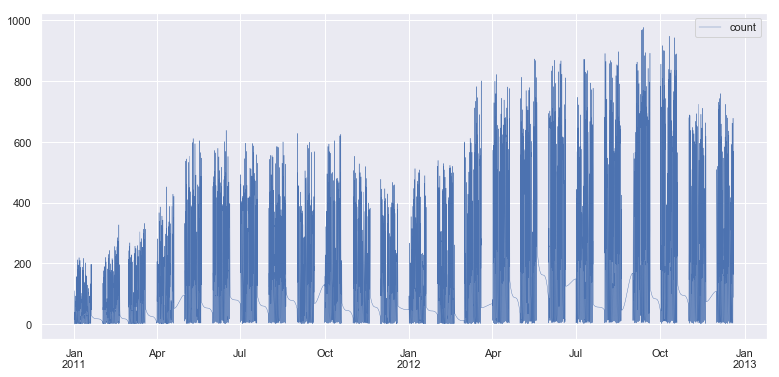

In [239]:
train_ts.interpolate(method='pchip', order=9).plot(linewidth=0.4)

In [243]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [245]:
# predicting features of the time-series data
train_ts_demo = train.drop('datetime', axis=1)
train_ts_demo = 
train_ts_demo.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1
